## 5. Plotting wind

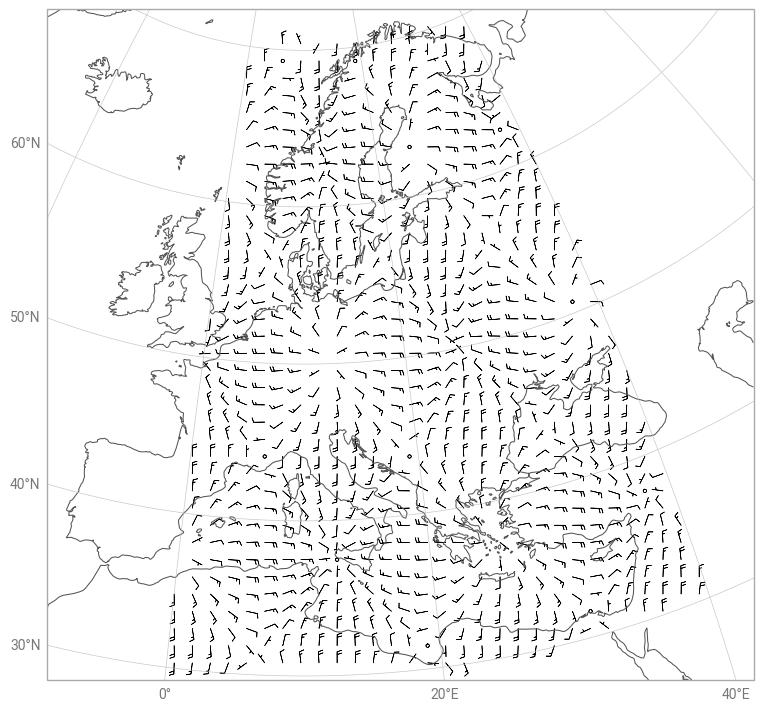

In [15]:
import earthkit.plots
import earthkit as ek
import numpy as np

x, y = np.meshgrid(
    np.linspace(0, 40, 41),
    np.linspace(30, 70, 41),
)

u = np.sin(x / 4.0) * np.cos(y / 4.0) * 20
v = np.cos(x / 4.0) * np.sin(y / 4.0) * 20

chart = earthkit.plots.Map(domain="Europe")

chart.barbs(u=u, v=v, x=x, y=y)

chart.coastlines()

chart.gridlines()

chart.show()

In [11]:
style = earthkit.plots.styles.Style(
    colors="turbo", levels=np.arange(0, 2, 0.1),)

### Resampling wind

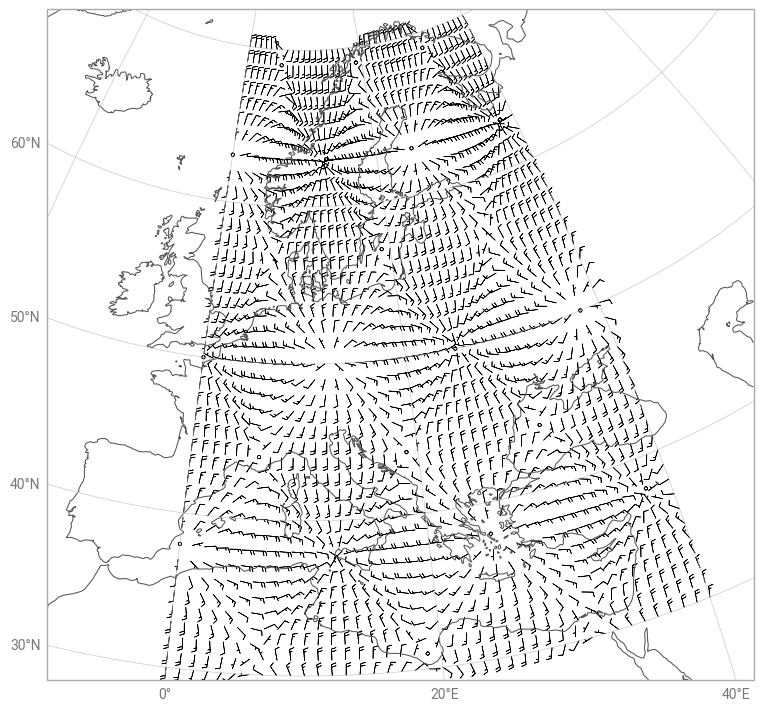

In [14]:
from earthkit.plots.resample import Subsample

x, y = np.meshgrid(
    np.linspace(0, 40, 41),
    np.linspace(30, 70, 41),
)

u = np.sin(x / 4.0) * np.cos(y / 4.0) * 20
v = np.cos(x / 4.0) * np.sin(y / 4.0) * 20

chart = earthkit.plots.Map(domain="Europe")

chart.barbs(u=u, v=v, x=x, y=y, resample=Subsample(nx=40, ny=40, mode="fixed"))

chart.coastlines()

chart.gridlines()

chart.show()

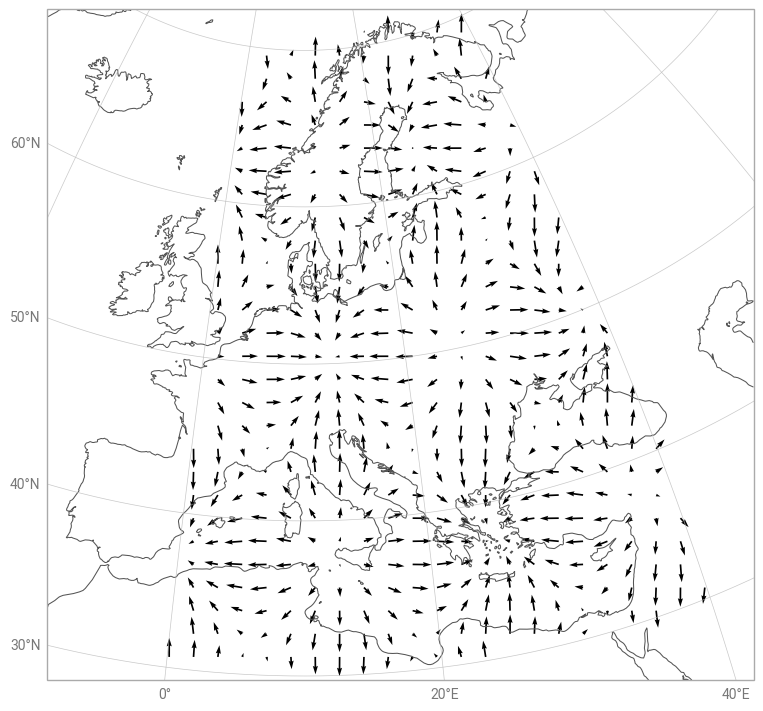

In [4]:
from earthkit.plots.resample import Regrid
import cartopy.crs as ccrs

x, y = np.meshgrid(
    np.linspace(0, 40, 41),
    np.linspace(30, 70, 41),
)

u = np.sin(x / 4.0) * np.cos(y / 4.0)
v = np.cos(x / 4.0) * np.sin(y / 4.0)

chart = earthkit.plots.Map(domain="Europe")
chart.quiver(u=u, v=v, x=x, y=y, resample=Regrid(30))

chart.coastlines()

chart.gridlines()

chart.show()

In [5]:
sst, u10, v10 = ek.data.from_source(
    'cds',
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            'sea_surface_temperature',
            "10m_u_component_of_wind",
            "10m_v_component_of_wind",
        ],
        'year': '1985',
        'month': '12',
        'day': '25',
        'time': '12:00',
    },
)

2025-02-13 15:00:17,161 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 15:00:17,161 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


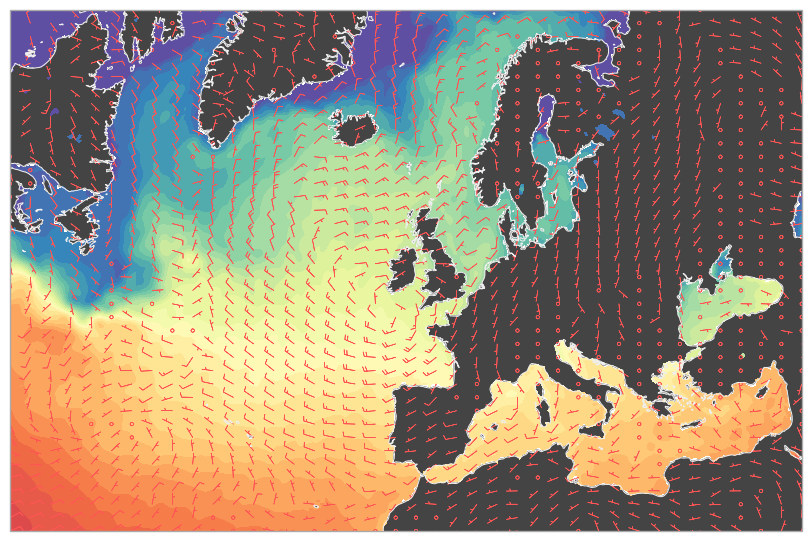

In [6]:
chart = ek.plots.Map(domain="North Atlantic")

chart.contourf(sst)
chart.land(color="#444")
chart.coastlines(color="#eee")

chart.barbs(u10, v10, color="#ff5555")

chart.show()